In [1]:
from src.DeepRock.models import AdvSeg
from src.DeepRock.data import DataGenerator
from src.DeepRock.utils import split_trn_vld_tst, test_fn, plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

C:\Users\yuch\Downloads\anaconda3\envs\nz_convnet\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
test_path = './data/test/'
sag_dtype = 'sent_ast_geo'
sa_dtype = 'sent_ast'
s_dtype = 'sent'

#### start to build Conv2D for different input data

In [3]:
s_conv = AdvSeg(dtype=s_dtype)
# sa_conv = AdvSeg(dtype=sa_dtype)
# sag_conv = AdvSeg(dtype=sag_dtype)
s_conv.build_SegmentationNet()
# sa_conv.build_SegmentationNet()
# sag_conv.build_SegmentationNet()

building Segmentation U-net ...
[64, 64, 64, 64]
[64, 64, 64]
compiling Segmentation only, lr is 0.001 ...


#### load weights

In [4]:
# sag_conv.load_weights('./Segmentation/sent_ast_geo/weights-115-0.77.hdf5')
# sa_conv.load_weights('./Segmentation/sent_ast/weights-107-0.71.hdf5')
s_conv.load_weights('./Segmentor/sent/weights-93-0.55.hdf5')

#### prepare test data

In [18]:
X_id = sorted(glob.glob('./data/block1/test/X/*.npy'))
X = [np.transpose(np.load(file)[:10,:,:], [1,2,0]) for file in X_id]
# sa_tst_data = DataGenerator(X_tst, Y_tst, batch_size=len(X_tst), shuffle=False, dtype=sa_dtype)
# sag_tst_data = DataGenerator(X_tst, Y_tst, batch_size=len(X_tst), shuffle=False, dtype=sag_dtype)

#### test

In [6]:
import glob

In [7]:
# convert the ground truth into a big block
ids = sorted(glob.glob('./data/block1/test/Y/*.npy'))
count = 0
track = []
for i in range(5):
    tmp1 = []
    for j in range(5):
        tmp1.append(np.argmax(np.load(ids[count]), axis=0))
        count += 1
    track.append(np.concatenate(tmp1, axis=1))
out = np.concatenate(track, axis=0)
np.save('./data/block1/Y.npy', out)

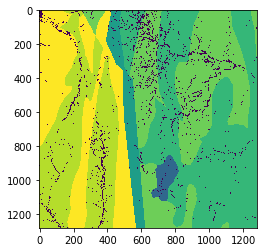

In [8]:
plt.imshow(out)

In [20]:
preds = s_conv.predict(np.stack(X))

In [21]:
count = 0
track = []
for i in range(5):
    tmp1 = []
    for j in range(5):
        tmp1.append(np.argmax(preds[count,:,:,:], axis=2))
        count += 1
    track.append(np.concatenate(tmp1, axis=1))
p = np.concatenate(track, axis=0)
np.save('./data/block1/preds.npy', p)

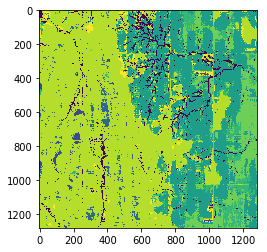

In [22]:
plt.imshow(p)

In [25]:
from sklearn import metrics

In [27]:
cm = metrics.confusion_matrix(out.flatten(), p.flatten(), np.arange(10))

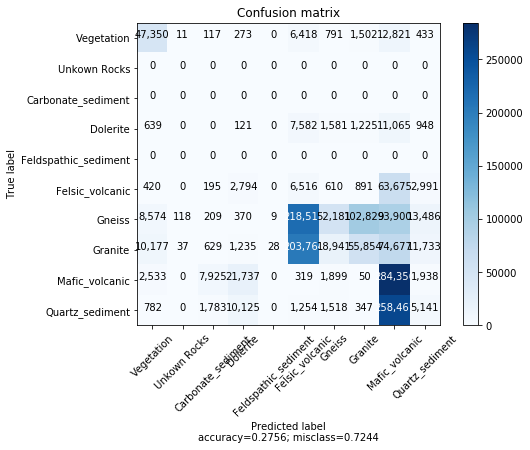

In [32]:
plot_confusion_matrix(cm, ['Vegetation', 'Unkown Rocks', 'Carbonate_sediment',
           'Dolerite', 'Feldspathic_sediment', 'Felsic_volcanic', 'Gneiss', 'Granite', 'Mafic_volcanic', 'Quartz_sediment'], 
                     normalize=False)

#### calculate the accuracy

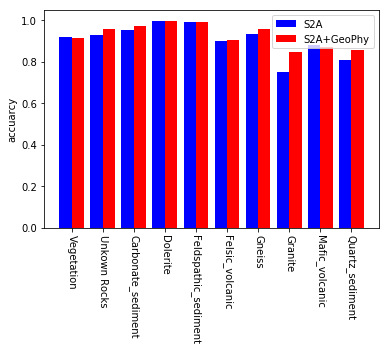

In [126]:
cls_names = ['Vegetation', 'Unkown Rocks', 'Carbonate_sediment',
           'Dolerite', 'Feldspathic_sediment', 'Felsic_volcanic', 'Gneiss', 'Granite', 'Mafic_volcanic', 'Quartz_sediment']
ax = plt.subplot(111)
ax.bar(np.arange(10)-0.2, acc_cls, width=0.4, color='b', align='center', label='S2A')
ax.bar(np.arange(10)+0.2, acc_cls_sg, width=0.4, color='r', align='center', label='S2A+GeoPhy')
plt.xticks(np.arange(10), cls_names, rotation=270)
plt.ylabel('accuarcy')
plt.legend()